In [1]:
%cd ../
%load_ext autoreload
%autoreload 2

/Users/cesarchalco/Documents/projects/TF-unstructured-data-HO/exercise-01


/opt/anaconda3/envs/tf-ex01/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import pandas as pd
import json

In [3]:
with open("config/config.json", "r") as f:
    config = json.load(f)

In [4]:
from src.dataloader import *

In [ ]:
X, y = prepare_data(
    path=config["DATA_PATH"],
    target_name=config["TARGET_NAME"],
    text_field=config["TEXT_FIELD"],
    max_tokens=config["VOCAB_SIZE"],
    output_sequence_length=config["OUTPUT_LENGTH"],
    output_mode="int",
)

In [6]:
from src.model import build_model

In [7]:
model = build_model(
    num_classes=len(np.unique(y)),
    vocab_size=config["VOCAB_SIZE"],
    sequence_length=config["OUTPUT_LENGTH"]
)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X.numpy(),
    y,
    test_size=0.2,
    random_state=config["SEED"]
)

In [10]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=32)

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3106 - loss: 1.5924 - val_accuracy: 0.4579 - val_loss: 1.5456
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4369 - loss: 1.5254 - val_accuracy: 0.5365 - val_loss: 1.4610
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5487 - loss: 1.4362 - val_accuracy: 0.6404 - val_loss: 1.3417
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6548 - loss: 1.3010 - val_accuracy: 0.7500 - val_loss: 1.1905
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7945 - loss: 1.1419 - val_accuracy: 0.8455 - val_loss: 1.0271
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8558 - loss: 0.9759 - val_accuracy: 0.9017 - val_loss: 0.8750
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9054 - loss: 0.8250 - val_accuracy: 0.8876 - val_loss: 0.7432
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9130 - loss: 0.6928 - val_accuracy: 0.9129 - val_loss:

In [11]:
import matplotlib.pyplot as plt

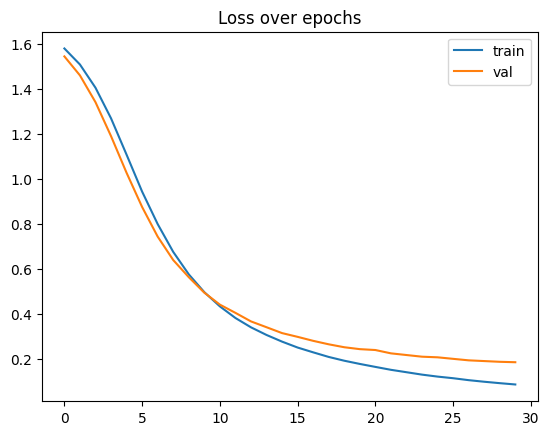

In [12]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.title('Loss over epochs')
plt.show()

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.9077 - loss: 0.2730
Test accuracy: 0.9303
